<a href="https://colab.research.google.com/github/shrutin0492/DLCV-Lab/blob/main/blr_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/dlcv_lab/Exp1/bengaluru_house_prices.csv"
data = pd.read_csv(path)

In [5]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
import matplotlib.pyplot as plt

In [9]:
data = data.drop('society',axis=1)

In [10]:
data = data.drop('availability',axis=1)

In [11]:
data.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

In [12]:
ac_sq = data['total_sqft']

In [13]:
num = ['1','2','3','4','5','6','7','8','9','0']
sqft =[]
for i in ac_sq:
    i = i.strip()
    i = i[:4]
    i = i.strip()
    sqft.append(i)

In [14]:
No_of_sqft = []
for i in sqft:
    val = 0
    for j in range(0,len(i)):

        if i[j] in num:
            val *= 10
            n = int(i[j])
            val = val+n
        elif i[j] == '.':
            break
        else:
            val *= 10
    No_of_sqft.append(val)

In [15]:
len(No_of_sqft)

13320

In [16]:
data['No_of_sqft'] = pd.DataFrame(No_of_sqft)

In [17]:
data.head()

,area_type,location,size,total_sqft,bath,balcony,price,No_of_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200


In [18]:
data = data.drop('total_sqft',axis=1)

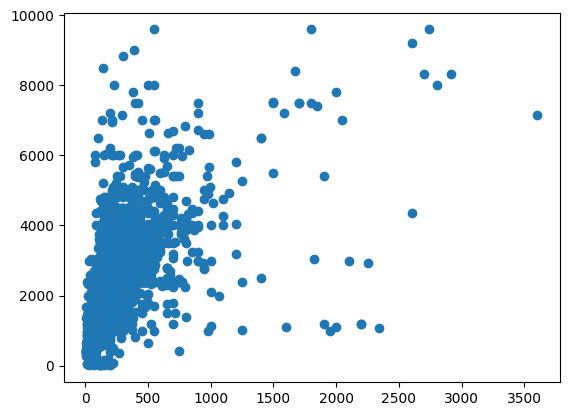

In [19]:
plt.scatter(data['price'],data['No_of_sqft'])

In [20]:
data.sort_values('price',ascending=False).head()

,area_type,location,size,bath,balcony,price,No_of_sqft
13067,Plot Area,Defence Colony,10 Bedroom,13.0,NaN,3600.0,7150
11080,Super built-up Area,Ashok Nagar,4 BHK,5.0,2.0,2912.0,8321
13200,Plot Area,Defence Colony,6 Bedroom,6.0,3.0,2800.0,8000
11763,Plot Area,Sadashiva Nagar,5 Bedroom,7.0,2.0,2736.0,9600
3180,Super built-up Area,Shanthala Nagar,5 BHK,5.0,3.0,2700.0,8321


In [21]:
df = data.sort_values('price',ascending=False).iloc[70:]

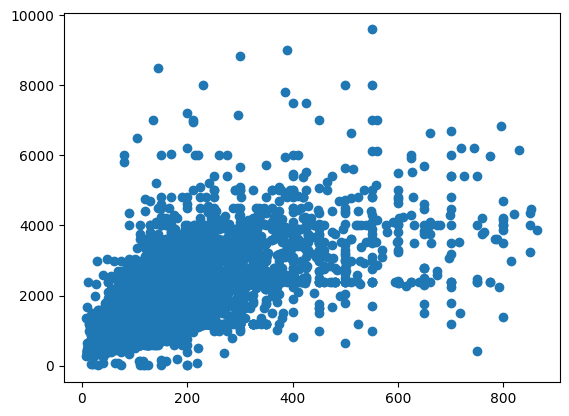

In [22]:
plt.scatter(df['price'],df['No_of_sqft'])

In [23]:
df = df.sort_values('No_of_sqft',ascending=False).iloc[30:]

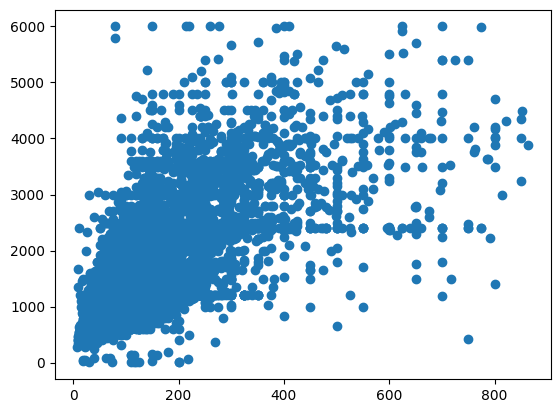

In [24]:
plt.scatter(df['price'],df['No_of_sqft'])

In [25]:
df = df.drop(['area_type','balcony'],axis=1)

In [26]:
df.isnull().sum()

location       1
size          16
bath          73
price          0
No_of_sqft     0
dtype: int64

In [27]:
df =df.dropna()

In [28]:
df.isnull().sum()

location      0
size          0
bath          0
price         0
No_of_sqft    0
dtype: int64

In [29]:
df['size']

13226    8 Bedroom
7979        11 BHK
5641     4 Bedroom
11615    3 Bedroom
10765    4 Bedroom
           ...    
1019     1 Bedroom
6333     2 Bedroom
7726     1 Bedroom
4086     4 Bedroom
10488    2 Bedroom
Name: size, Length: 13146, dtype: object

In [30]:
w = df['size']
k = []
for j in w:
    j = str(j)
    j = j.strip()
    if j[0] in num:
        k.append(int(j[0]))
    else:
        k.append(None)

In [31]:
df = df.drop('size',axis=1)

In [32]:
df['size'] = pd.DataFrame(k)

In [33]:
df.head()

,location,bath,price,No_of_sqft,size
13226,Raja Rajeshwari Nagar,8.0,215.0,6000,NaN
7979,1 Immadihalli,12.0,150.0,6000,3.0
5641,Electronic City Phase II,4.0,260.0,6000,2.0
11615,arudi,2.0,80.0,6000,2.0
10765,Whitefield,4.0,410.0,6000,2.0


In [34]:
df.isnull().sum()

location        0
bath            0
price           0
No_of_sqft      0
size          171
dtype: int64

In [35]:
df = df.dropna()

In [36]:
df.isnull().sum()

location      0
bath          0
price         0
No_of_sqft    0
size          0
dtype: int64

In [37]:
len(df)

12975

In [38]:
df['location'].unique()

array(['1 Immadihalli', 'Electronic City Phase II', 'arudi', ...,
       'Grihalakshmi Layout', 'Marathi Layout',
       '2 Bedroom Furnished Farm House in Kolar Road'], dtype=object)

In [39]:
location_count = df.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [40]:
location_count

location
Whitefield              525
Sarjapur  Road          380
Electronic City         298
Kanakpura Road          265
Thanisandra             231
                       ... 
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
Kanakapura Main Road      1
whitefiled                1
Name: location, Length: 1291, dtype: int64

In [41]:
less = location_count[location_count < 30]
less

location
Ambedkar Nagar          29
Dodda Nekkundi          29
BTM 2nd Stage           29
Kammasandra             29
Kudlu                   28
                        ..
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
Kanakapura Main Road     1
whitefiled               1
Name: location, Length: 1193, dtype: int64

In [42]:
df.location = df['location'].apply(lambda x: 'other' if x in less else x)

In [43]:
df['location'].unique()

array(['other', 'Electronic City Phase II', 'Whitefield', 'Koramangala',
       'Hebbal', 'Sarjapur  Road', 'Hennur Road', 'Frazer Town', 'Jakkur',
       '7th Phase JP Nagar', 'Devanahalli', '9th Phase JP Nagar',
       'Rajaji Nagar', 'Hormavu', 'Tumkur Road', 'Chandapura',
       'TC Palaya', 'Raja Rajeshwari Nagar', 'Bannerghatta Road',
       'Vidyaranyapura', 'Haralur Road', 'KR Puram', 'Hosakerehalli',
       'Old Madras Road', 'Varthur', 'Uttarahalli', 'Kasavanhalli',
       'Sarjapur', 'Yelahanka', 'Thigalarapalya', 'Channasandra',
       'Bellandur', 'Ramagondanahalli', 'HSR Layout',
       'Kengeri Satellite Town', 'Marathahalli', 'JP Nagar',
       'Indira Nagar', 'Kothanur', 'Kadugodi', 'Electronic City',
       '5th Phase JP Nagar', 'Hebbal Kempapura', 'Kudlu Gate',
       'Hegde Nagar', 'Ramamurthy Nagar', 'Brookefield', 'Thanisandra',
       'Rachenahalli', 'Attibele', 'Hosur Road', 'R.T. Nagar',
       'Yeshwanthpur', 'Banashankari', 'Hulimavu', 'Mahadevpura',
       '

In [44]:
len(df.location.unique())

99

In [45]:
df.head()

,location,bath,price,No_of_sqft,size
7979,other,12.0,150.0,6000,3.0
5641,Electronic City Phase II,4.0,260.0,6000,2.0
11615,other,2.0,80.0,6000,2.0
10765,Whitefield,4.0,410.0,6000,2.0
7824,other,1.0,276.0,6000,5.0


In [46]:
df1 = df[df['No_of_sqft']/df['size'] >300 ]

In [47]:
df1.describe()

,bath,price,No_of_sqft,size
count,11051.000000,11051.00000,11051.000000,11051.000000
mean,2.750339,111.53872,1589.039996,2.511718
std,1.281479,103.55149,747.219651,0.818078
min,1.000000,10.00000,350.000000,1.000000
25%,2.000000,53.00000,1160.000000,2.000000
50%,2.000000,75.00000,1343.000000,2.000000
75%,3.000000,125.00000,1745.000000,3.000000
max,40.000000,864.00000,6000.000000,9.000000


In [48]:
df1['per_sqft']= df1['price']*100000/df1['No_of_sqft']

<ipython-input-48-edea16160729>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['per_sqft']= df1['price']*100000/df1['No_of_sqft']


In [49]:
df1.head()

,location,bath,price,No_of_sqft,size,per_sqft
7979,other,12.0,150.0,6000,3.0,2500.000000
5641,Electronic City Phase II,4.0,260.0,6000,2.0,4333.333333
11615,other,2.0,80.0,6000,2.0,1333.333333
10765,Whitefield,4.0,410.0,6000,2.0,6833.333333
7824,other,1.0,276.0,6000,5.0,4600.000000


In [50]:
df1.describe()

,bath,price,No_of_sqft,size,per_sqft
count,11051.000000,11051.00000,11051.000000,11051.000000,11051.000000
mean,2.750339,111.53872,1589.039996,2.511718,6568.863552
std,1.281479,103.55149,747.219651,0.818078,3936.510203
min,1.000000,10.00000,350.000000,1.000000,500.000000
25%,2.000000,53.00000,1160.000000,2.000000,4298.957895
50%,2.000000,75.00000,1343.000000,2.000000,5480.427046
75%,3.000000,125.00000,1745.000000,3.000000,7272.727273
max,40.000000,864.00000,6000.000000,9.000000,76923.076923


In [51]:
df1.shape

(11051, 6)

In [52]:
def no_outlier(df):
    df3 = pd.DataFrame()
    for a,grp in df.groupby('location'):
        m = grp['per_sqft'].mean()
        s = grp['per_sqft'].std()
        scaled_df = grp[(grp['per_sqft']>(m-s))&(grp['per_sqft']<(m+s))]
        df3 = pd.concat([df3,scaled_df])
    return df3
#         print(m,s, a)
df2 = no_outlier(df1)
df2.shape

(9288, 6)

In [53]:
def check_size_price_distribution(df,location):
    size_2 = df[(df['size']==2) & (df['location']==location)]
    size_3 = df[(df['size']==3) & (df['location']==location)]
    plt.figure(figsize=(10,8))
    plt.scatter(size_2['No_of_sqft'],size_2['price'],label='size_2')
    plt.scatter(size_3['No_of_sqft'],size_3['price'],marker='+',label='size_3')
    plt.xlabel('No of Sqft')
    plt.ylabel('price')

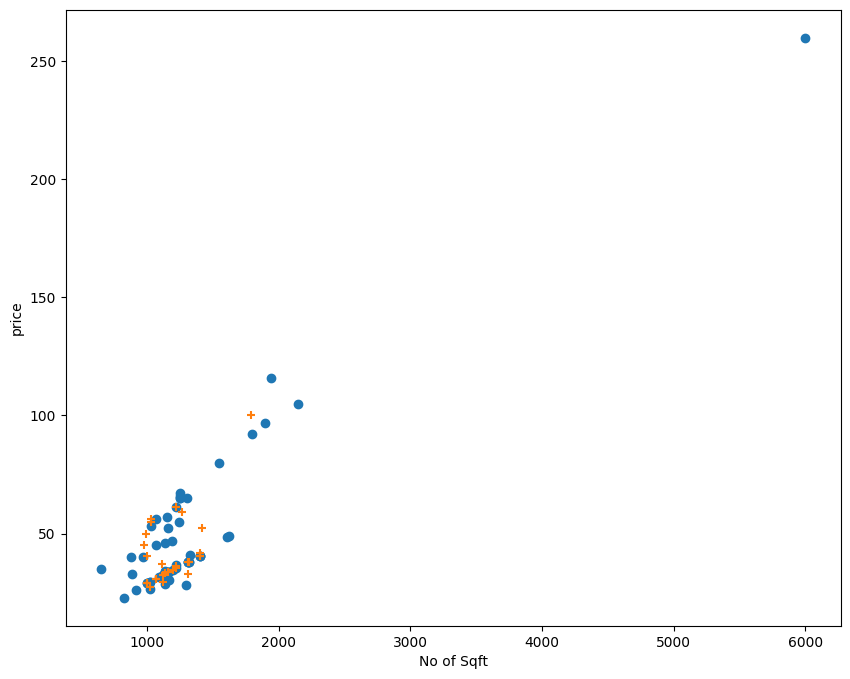

In [54]:
check_size_price_distribution(df2,'Electronic City Phase II')

In [55]:
def no_size_outliers(df):
    m = np.array([])
    for location, grp_loc in df.groupby('location'):
        size_stats = {}
        for size, grp_size in grp_loc.groupby('size'):
            size_stats[size] = {
                'mean': grp_size['per_sqft'].mean(),
                'std': grp_size['per_sqft'].std(),
                'count': grp_size.shape[0]
            }
        for size, grp_size in grp_loc.groupby('size'):
            stats = size_stats.get(size-1)
            if stats and stats['count']>5:
                m = np.append(m, grp_size[(grp_size['per_sqft'])<(stats['mean'])].index.values)
    return df.drop(m,axis='index')
df3 = no_size_outliers(df2)
df3.shape

(5352, 6)

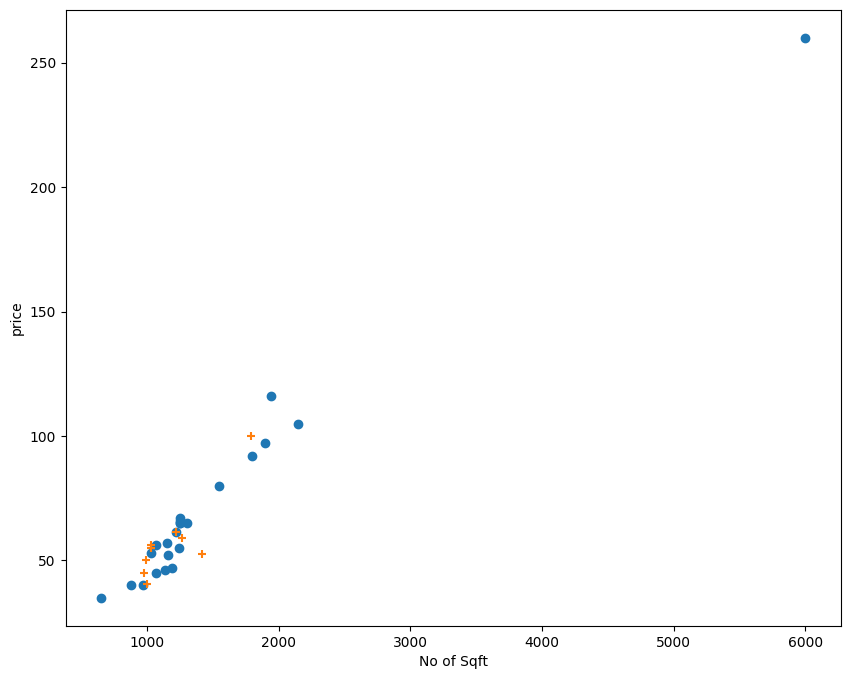

In [56]:
check_size_price_distribution(df3,'Electronic City Phase II')

In [57]:
dummies = pd.get_dummies(df3['location'])
dummies

,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Ananth Nagar,Anekal,Attibele,Balagere,Banashankari,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
11030,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12413,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1755,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8793,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13076,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
df4 = pd.concat([df3,dummies],axis=1)

In [59]:
df4

,location,bath,price,No_of_sqft,size,per_sqft,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
11030,5th Phase JP Nagar,5.0,170.0,4000,2.0,4250.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12413,5th Phase JP Nagar,8.0,95.0,2500,1.0,3800.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1755,5th Phase JP Nagar,2.0,100.0,1725,3.0,5797.101449,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,5th Phase JP Nagar,2.0,100.0,1700,3.0,5882.352941,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8793,5th Phase JP Nagar,3.0,75.0,1550,2.0,4838.709677,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12196,other,1.0,22.0,540,1.0,4074.074074,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12604,other,1.0,24.0,540,1.0,4444.444444,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13076,other,1.0,20.0,500,1.0,4000.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4299,other,1.0,35.0,440,1.0,7954.545455,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
df4.head()

,location,bath,price,No_of_sqft,size,per_sqft,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
11030,5th Phase JP Nagar,5.0,170.0,4000,2.0,4250.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12413,5th Phase JP Nagar,8.0,95.0,2500,1.0,3800.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1755,5th Phase JP Nagar,2.0,100.0,1725,3.0,5797.101449,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,5th Phase JP Nagar,2.0,100.0,1700,3.0,5882.352941,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8793,5th Phase JP Nagar,3.0,75.0,1550,2.0,4838.709677,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df4 = df4.drop('location',axis=1)

In [62]:
df4 = df4.drop('per_sqft',axis=1)

In [63]:
df4

,bath,price,No_of_sqft,size,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Ananth Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
11030,5.0,170.0,4000,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12413,8.0,95.0,2500,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1755,2.0,100.0,1725,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,2.0,100.0,1700,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8793,3.0,75.0,1550,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12196,1.0,22.0,540,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12604,1.0,24.0,540,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13076,1.0,20.0,500,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4299,1.0,35.0,440,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
df4.corr()

,bath,price,No_of_sqft,size,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Ananth Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
bath,1.000000,0.594058,0.644299,0.195303,-0.009483,-0.037129,-0.006832,-0.016384,-0.012816,-0.027250,...,-0.066012,-0.033091,0.022500,0.002827,-0.039030,0.036065,-0.032890,-0.021031,-0.000744,0.165867
price,0.594058,1.000000,0.860637,0.246481,-0.025762,-0.017289,-0.037987,-0.013618,-0.033719,-0.055615,...,-0.080803,-0.050746,-0.024891,-0.005666,-0.039818,0.065130,-0.052274,-0.023142,0.006415,0.207379
No_of_sqft,0.644299,0.860637,1.000000,0.237970,-0.008193,-0.028706,-0.012223,0.011026,-0.012350,-0.043339,...,-0.055431,-0.036469,-0.030329,-0.014637,-0.029416,0.097612,-0.022240,-0.011602,0.011118,0.111358
size,0.195303,0.246481,0.237970,1.000000,-0.006478,0.009609,-0.033263,-0.004232,0.000529,-0.015556,...,0.007482,-0.010211,-0.011690,0.036591,0.007192,0.026736,-0.010057,-0.015556,0.003110,0.033748
5th Phase JP Nagar,-0.009483,-0.025762,-0.008193,-0.006478,1.000000,-0.006972,-0.004136,-0.003732,-0.004645,-0.003181,...,-0.006878,-0.004434,-0.003181,-0.003816,-0.004213,-0.012805,-0.008454,-0.003181,-0.004288,-0.040319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whitefield,0.036065,0.065130,0.097612,0.026736,-0.012805,-0.026456,-0.015696,-0.014162,-0.017625,-0.012070,...,-0.026101,-0.016825,-0.012070,-0.014481,-0.015986,1.000000,-0.032079,-0.012070,-0.016270,-0.152993
Yelahanka,-0.032890,-0.052274,-0.022240,-0.010057,-0.008454,-0.017467,-0.010363,-0.009350,-0.011636,-0.007969,...,-0.017232,-0.011108,-0.007969,-0.009561,-0.010554,-0.032079,1.000000,-0.007969,-0.010742,-0.101008
Yelahanka New Town,-0.021031,-0.023142,-0.011602,-0.015556,-0.003181,-0.006572,-0.003899,-0.003518,-0.004378,-0.002999,...,-0.006484,-0.004180,-0.002999,-0.003597,-0.003971,-0.012070,-0.007969,1.000000,-0.004042,-0.038006
Yeshwanthpur,-0.000744,0.006415,0.011118,0.003110,-0.004288,-0.008859,-0.005256,-0.004742,-0.005902,-0.004042,...,-0.008740,-0.005634,-0.004042,-0.004849,-0.005353,-0.016270,-0.010742,-0.004042,1.000000,-0.051230


<Axes: >

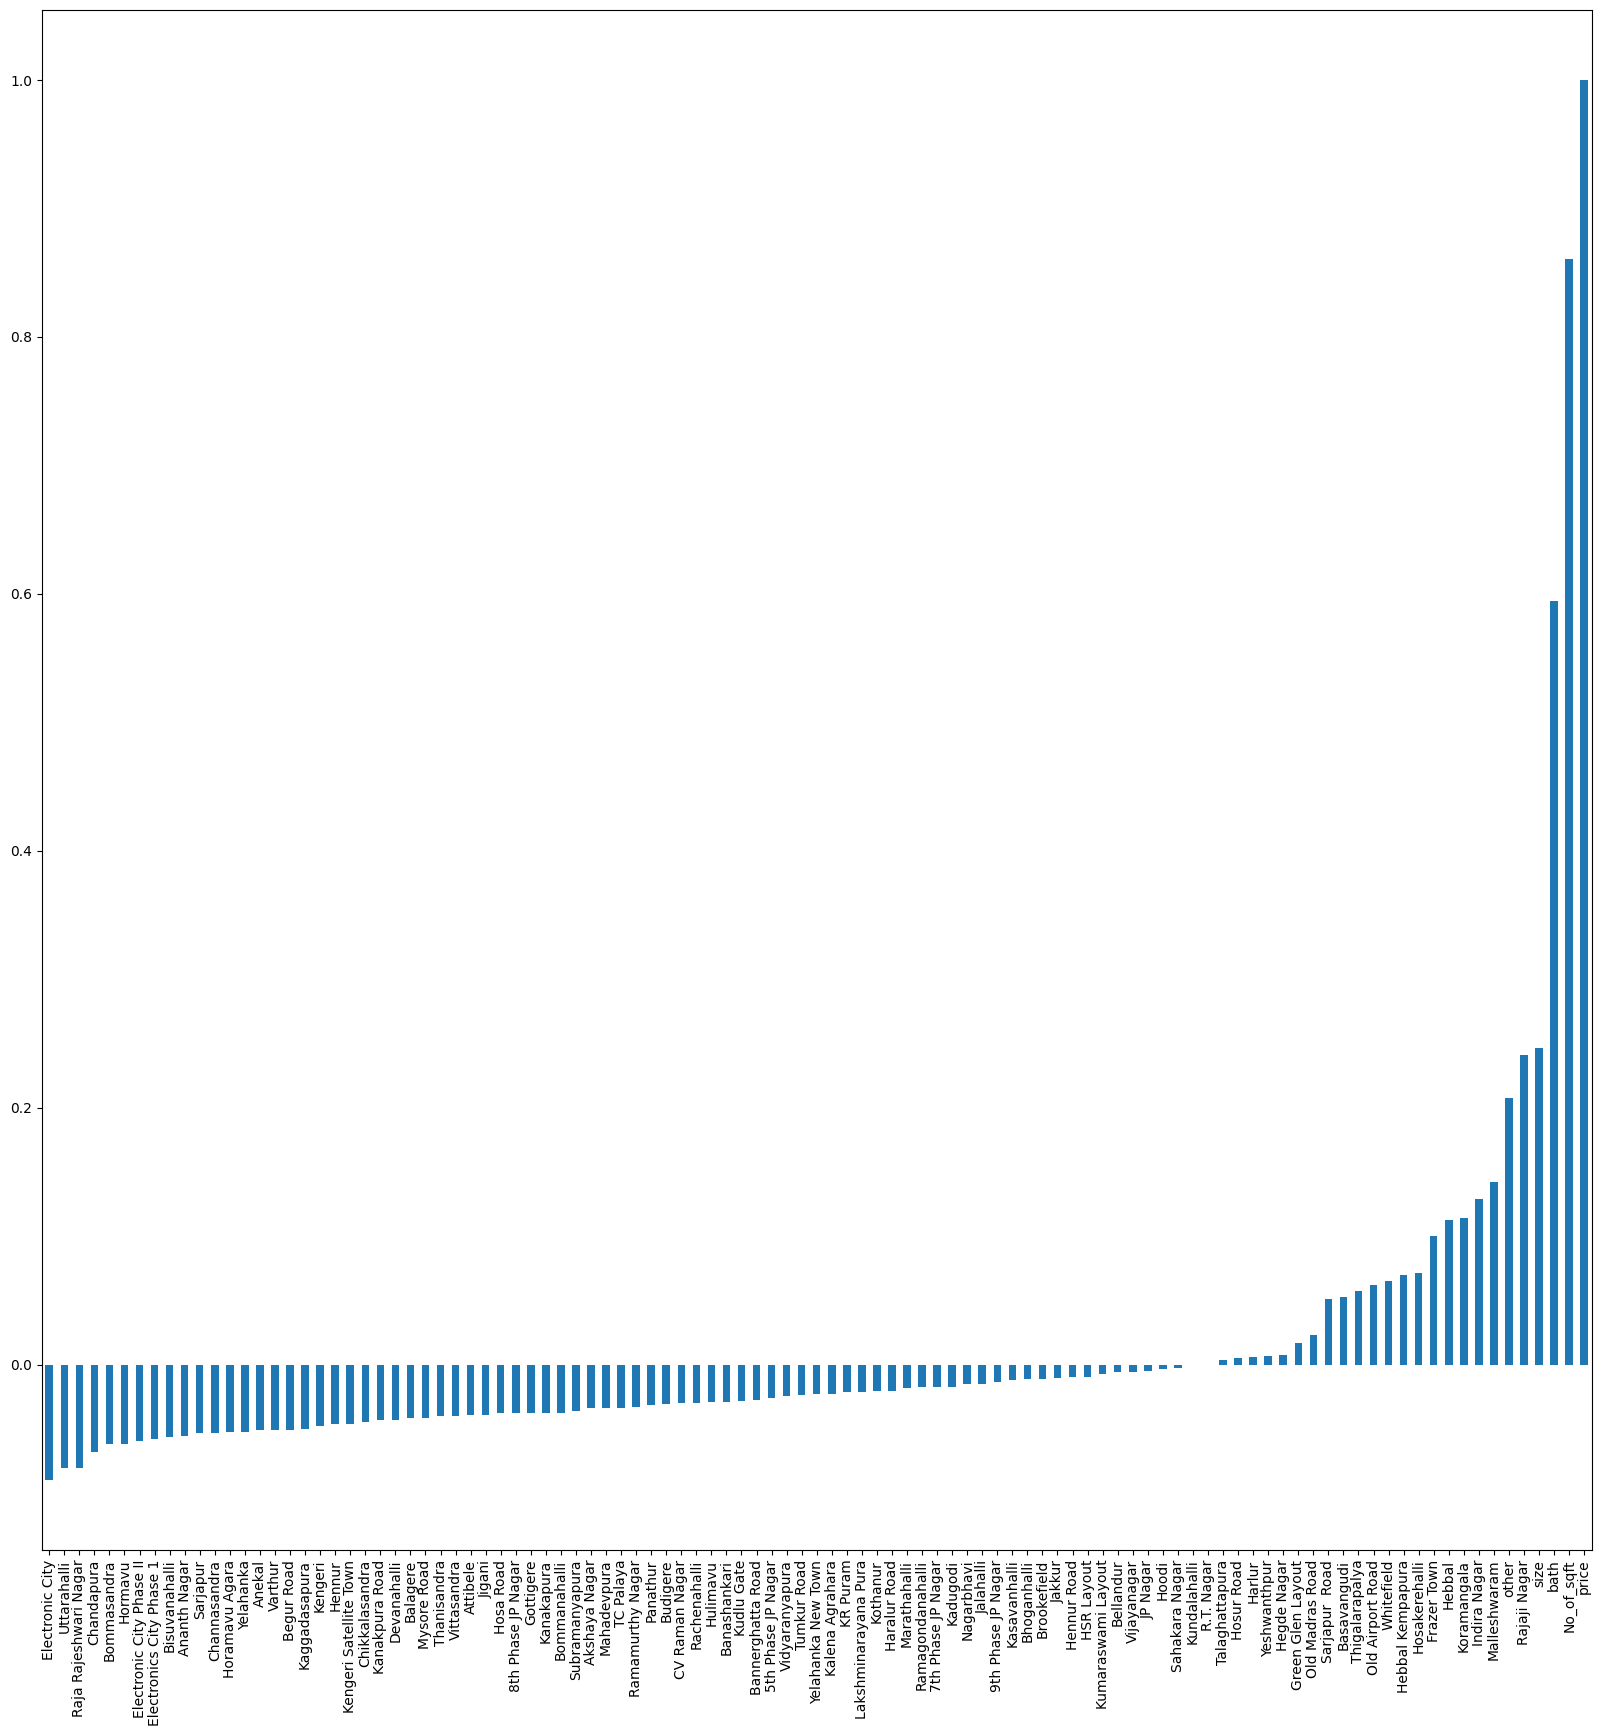

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
df4.corr()['price'].sort_values().plot(kind='bar')

<Axes: >

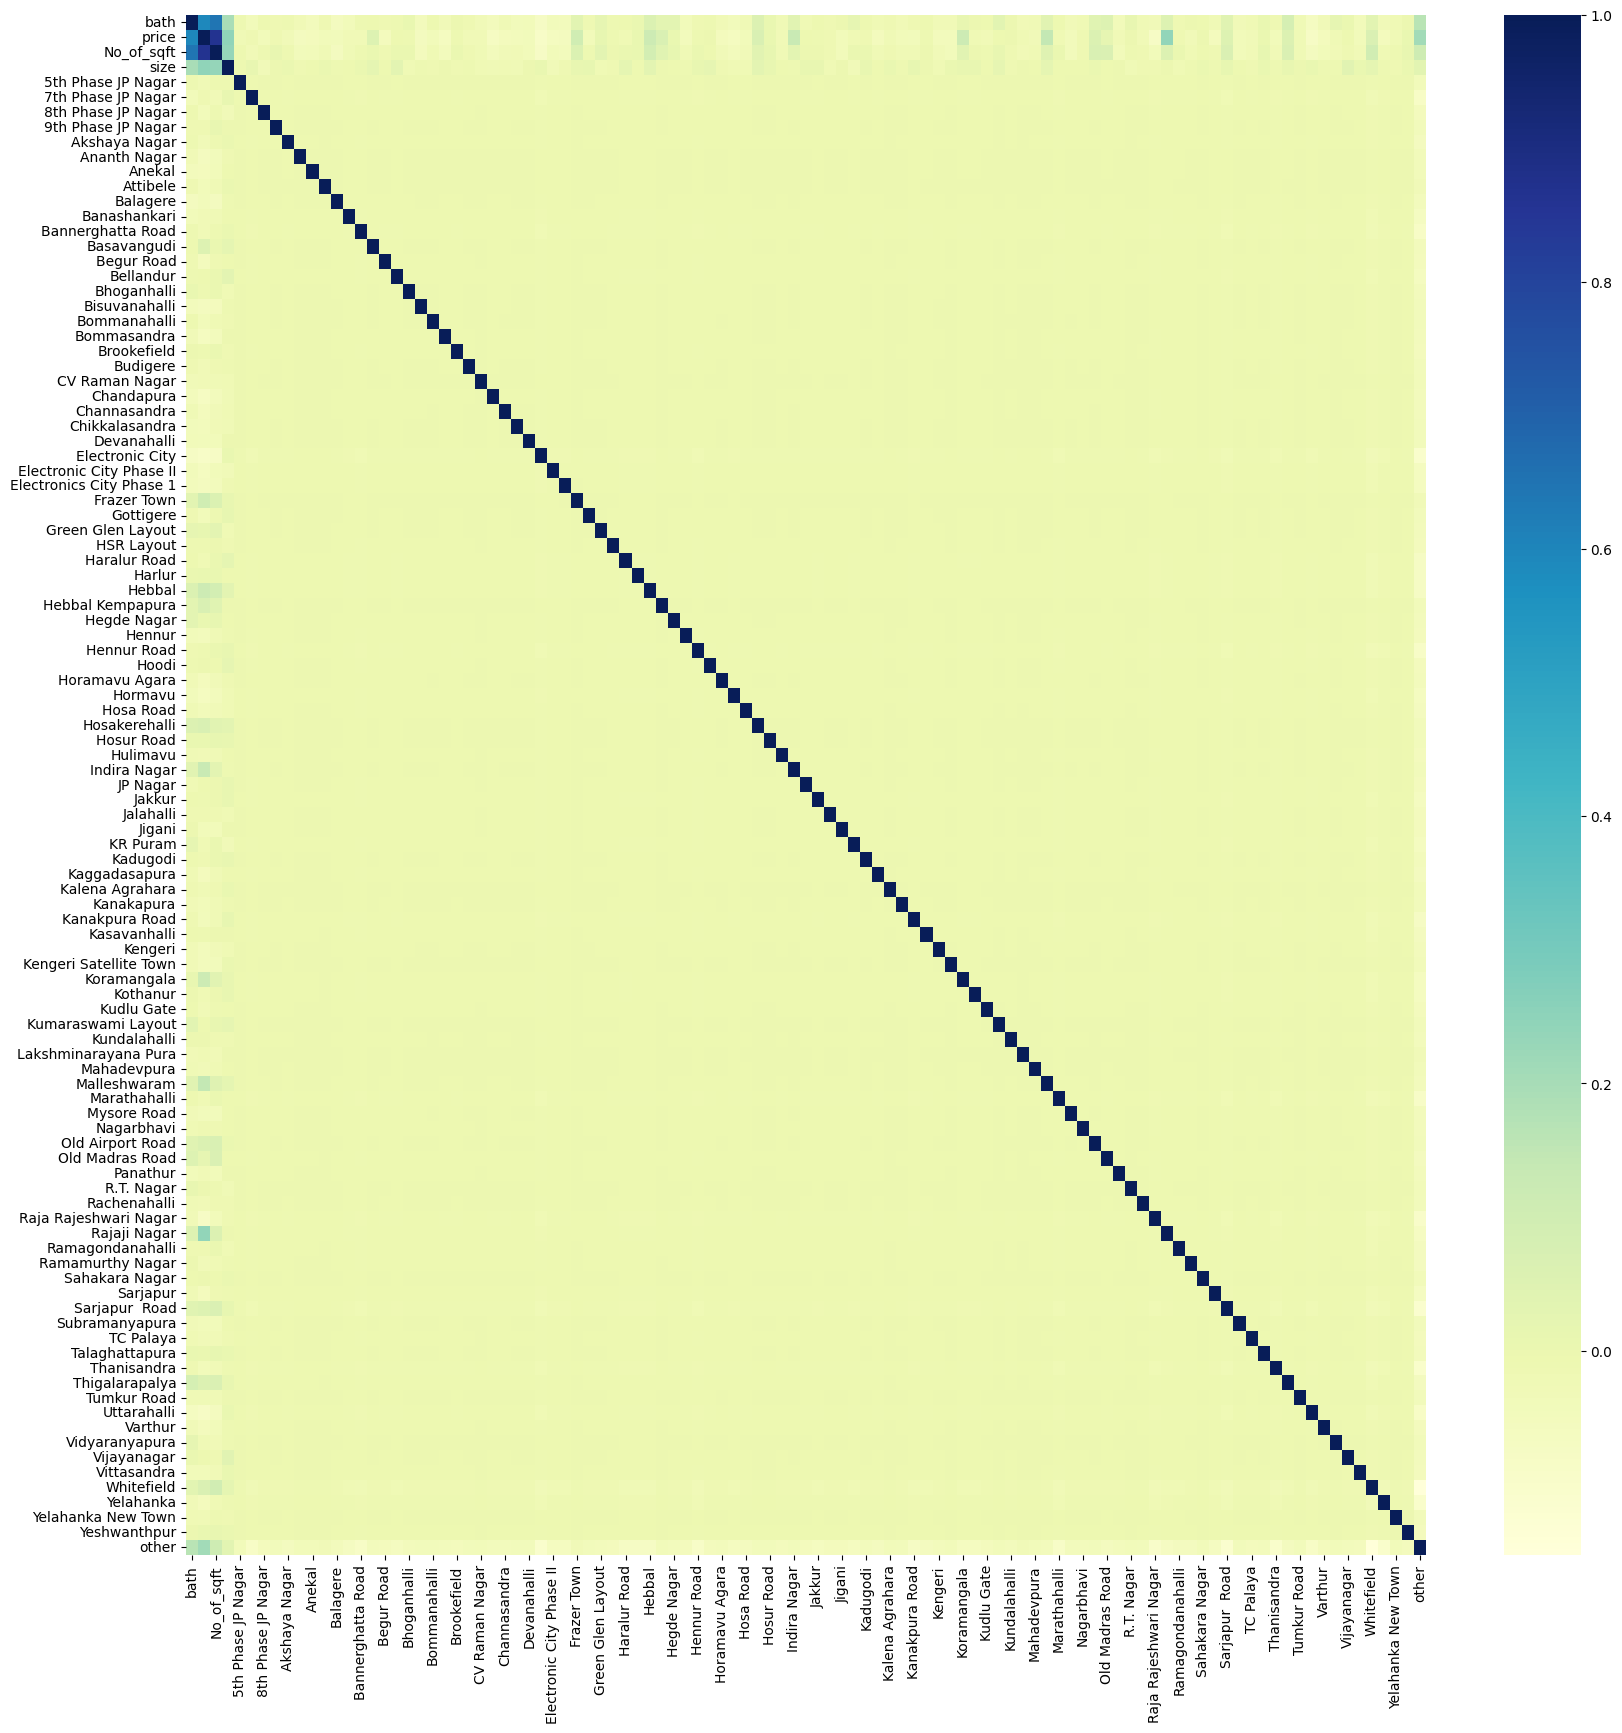

In [66]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(df4.corr(),cmap="YlGnBu",annot=False)

In [67]:
x = df4.drop('price',axis=1).values
y = df4['price'].values

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state= 10)

In [69]:
x_train.shape

(4281, 102)

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [73]:
model = Sequential()
model.add(Dense(120,activation='relu'))
# model.add(Dense(480,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [74]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size= 80,epochs=150)

Epoch 1/150
54/54 [==============================] - 2s 12ms/step - loss: 15585.1553 - val_loss: 10218.3682
Epoch 2/150
54/54 [==============================] - 1s 10ms/step - loss: 4468.5981 - val_loss: 3998.3376
Epoch 3/150
54/54 [==============================] - 0s 6ms/step - loss: 2872.7148 - val_loss: 2903.9768
Epoch 4/150
54/54 [==============================] - 0s 7ms/step - loss: 2080.0303 - val_loss: 2138.3591
Epoch 5/150
54/54 [==============================] - 0s 7ms/step - loss: 1484.6414 - val_loss: 1515.4841
Epoch 6/150
54/54 [==============================] - 0s 7ms/step - loss: 1133.7054 - val_loss: 1207.2891
Epoch 7/150
54/54 [==============================] - 0s 7ms/step - loss: 964.1534 - val_loss: 1035.6112
Epoch 8/150
54/54 [==============================] - 0s 7ms/step - loss: 890.8550 - val_loss: 949.6275
Epoch 9/150
54/54 [==============================] - 0s 6ms/step - loss: 844.6660 - val_loss: 916.2428
Epoch 10/150
54/54 [==============================] - 0s

In [75]:
losses = pd.DataFrame(model.history.history)

In [76]:
losses

,loss,val_loss
0,15585.155273,10218.368164
1,4468.598145,3998.337646
2,2872.714844,2903.976807
3,2080.030273,2138.359131
4,1484.641357,1515.484131
...,...,...
145,601.132202,788.961670
146,592.856689,785.884888
147,605.078552,798.117371
148,601.328552,785.583862


<Axes: >

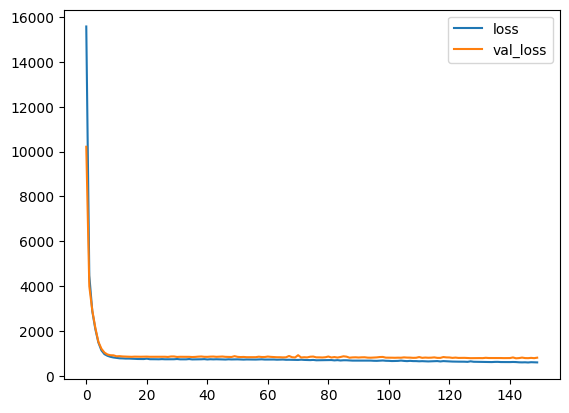

In [77]:
import matplotlib.pyplot as plt
losses.plot()

In [78]:
predictions = model.predict(x_test)

34/34 [==============================] - 0s 4ms/step


In [79]:
predictions

array([[ 73.12   ],
       [141.82875],
       [100.29388],
       ...,
       [ 79.96892],
       [101.68296],
       [ 89.77111]], dtype=float32)

In [80]:
y_test

array([ 92., 165.,  90., ..., 105., 169., 125.])

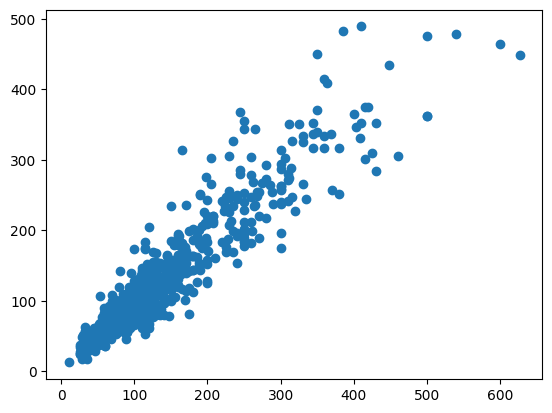

In [81]:
plt.scatter(y_test,predictions)

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8654122946191407